## Spectral Clustering
### General Description & Application

The idea of spectral clustering is rooted in graph theory. The spectral clustering algorithm aims to identify communities of nodes in a graph based on connections between them. It can be understood as aiming to maximize the number of within-cluster connections and to minimize the number of between-cluster connections. The spectral clustering algorithm also allows for clustering of non graph data. Thus, points that are (immediately) next to each other, i.e. closely connected, are identified in dataset.

The spectral clustering algorithm utilizes information from the eigenvalues and eigenvectors of the Laplacian Matrix. A standard clustering algorithm, such as KMeans, is applied on relevant eigenvectors of the Laplacian matrix to cluster the different data points. 

### Steps
The generall process of the spectral clustering algorithm can be illustrated by the following steps, which will be outlined in more detail later on: 
1. Construct the Affinity Matrix based on the datapoints
2. Create the Degree Matrix based on the Affinity Matrix
3. Construct the Laplacian Matrix by subtracting the Affinity matrix from the Degree Matrix
4. Eigendecomposition of Laplacian Matrix
5. Apply a standard clustering algorithm, e.g. KMeans, on the relevant eigenvectors of the Laplacian Matrix

The previously outlined steps will now be described in more detail: 

#### Step 1: Affinity Matrix
**EDIT: PROPERTIES OF AFFINITY MATRIX**  
The entries of an affinity matrix show how similar points are to each other. If pairs of points are very dissimilar then the affinity should be 0. If the points are identical, then the affinity should equal 1. The Affinity Matrix can be constructed in different ways. Therefore, Scikit-Learn's [implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)  includes the hyperparameter *affinity*, which defines how to construct the affinity matrix. Four options are available: `nearest_neighbors`, `rbf`, `precomputed`and `precomputed_nearest_neighbors`.
- `nearest_neighbors` constructs the affinity matrix by computing a graph of nearest neighbors. If chosen, the hyperparameter `n_neighbors` also needs to be set as this determines the number of neighbors to use when constructing the affinity matrix.
- `rbf` constructs the affinity matrix using a radial basis function (RBF) kernel
- `precomputed` interprets X as a precomputed affinity matrix, where larger values indicate greater similarity between instances
- `precomputed_nearest_neighbors` interprets X as a sparse graph of precomputed distances, and construct a binary affinity matrix from the n_neighbors nearest neighbors of each instance

It will now be detailed, how the Affinity Matrix is constructed using `nearest_neighbors` and `rbf`, i.e. in those cases where no precomputed Affinity Matrix is provided:

**nearest_neighbors:**  
Setting the parameter *affinity* to `nearest_neighbors`, the affinity matrix is calculated using k-nearest neighbors method. Thus, the number of neighbors to use when constructing the affinity matrix needs to be specified using the parameter `n_neighbors`. Let's call the matrix, which stores the relationships of k-nearest neighbours, *connectivity*. If another datapoint belongs to the k-nearest neighbors, the matrix will indicate it with an entry of 1. If it does not belong to the k-nearest neighbors, it will be indicated with a 0. The affinity matrix is calculated using the following formula:

$$
{Affinity\ Matrix} = 0.5 * (connectivity + connectivity^T)
$$ 

Thus, each entry in the affinity matrix can only take up one of three possible entries: 1.0, 0.5 or 0.0. 
- `1.0` indicates that when calculating the closest k-nearest neighbours, both datapoints were amongst the respective nearest k-datapoints 
- `0.5` indicates that this was only true for one datapoint, i.e. only in one direction
- `0.0` indicates forh both datapoints, the other respective datapoint was not among the k-nearest

Let's assume the following example:
![](Affinity_Matrix_nearest_neighbor.png "Title")

For data point 0, the two-nearest neighbors (including itself) are data point 0 and data point 1. For data point 1, only data point 1 and data point 2 are the two-nearest neighbors. In turn, the affinity matrix shows 0.5 at the entry row 0, column 1.

**rbf:**  
Setting the parameter *affinity* to `rbf`, i.e. also its default setting, the Affinity Matrix is constructed using a kernel function with Euclidean distance d(X, X): 

`np.exp(-gamma * d(X,X) ** 2)`

The default for `gamma` is 1.0 as can be inferred from Scikit Learn's [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html). Here, the entries of the affinity matrix can take any value between 0.0 and 1.0, where values close to 0.0 indicate dissimilarity and values close to 1.0 indicate similarity.

![](Affinity_Matrix_rbf.png "Title")

#### Step 2: Degree Matrix 
The Degree Matrix is a diagonal matrix, which is obtained by taking the sum of each row in the affinity matrix. The entries on the diagonal are called *degree*.

#### Step 3: Laplacian Matrix
The (unnormalized) Laplacian Matrix is calculated by subtracting the Affinity Matrix from the Degree Matrix.

$$
L = D - A
$$

In the following, the Affinity Matrix, Degree Matrix and Laplacian Matrix are illustrated for the example using the `rbf`for the parameter *affinity*.

![](Laplacian_Matrix_rbf.png "Title")

#### Step 4: Eigendecomposition of Laplacian Matrix
In the next step, the eigenvalues and eigenvectors of the Laplacian Matrix are calculated. The eigenvalues contain information about the number of clusters within the given dataset. In general, we search for the first large gap between the eigenvalues. The number of eigenvalues before this gap generally corresponds to the number of clusters in our dataset. As can be seen by the following stylized examples, we can identify a gap between eigenvalues number 2 and 3 as well as between number 3 and 4, which in turn help to determine the respective number of clusters.   

![](Eigenvalues_Laplacian.png "Title")

#### Step 5: Application of standard clustering algorithm 
The eigenvectors associated with the smallest eigenvalues are used for the partitioning of the dataset, except for the eigenvector corresponding to the first eigenvalue, i.e. the so called *spectral gap*. This eigenvalue will have a value of zero. A standard clustering algorithm is applied on the set of eigenvectors. The default clustering algorithm herefore is KMeans.

### Select Parameters (Scikit Learn Implementation)
**n_cluster:** The parameter *n_clusters* defines the dimension of the projection subspace, i.e. the number of clusters.

**eigen_solver:**
This parameter determines which eigenvalue decomposition strategy to use.

**affinity:** 
This parameter defines how to construct the affinity matrix. Four options are available: `nearest_neighbors`, `rbf`, `precomputed`and `precomputed_nearest_neighbors` (see above).

**n_init:**  
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. Only used if assign_labels='kmeans'.

**assign_labels:**  
The strategy for assigning labels in the embedding space, i.e. the clustering algorithm. There are two ways to assign labels after the Laplacian embedding: `kmeans` and `discretize`. k-means is a popular choice, but it can be sensitive to initialization. Discretization is another approach which is less sensitive to random initialization`

**Note**: Parameter names and descriptions were obtained from the official Scikit Learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering).

**EDIT: FINAL REMARKS**  
Lastly, we will briefly outline some advantages and disadvantages of the spectral clustering algorithm. **XXX**
Nevertheless, the spectral clustering algorithm still requires us to specify the number of clusters beforehand as indicated by the hyperparamter `n_cluster`. In that sense, it has the same disadvantage as KMeans. 

# Spectral Clustering

## Theoretical Introduction

## Assumed Strengths and Weaknesses
- That means that the key for spectral clustering is the transformation of the space. Presuming we can better respect the manifold we’ll get a better clustering – we need worry less about K-Means globular clusters as they are merely globular on the transformed space and not the original space.
- we still partition the data instead of clustering it
- we have the hard to guess ‘number of clusters’ parameter
- we have stability issues inherited from K-Means
- if we operate on the dense graph of the distance matrix we have a very expensive initial step and sacrifice performance.
- In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

**Sources:**  
- Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurelien Geron (2020)
- https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html  
- https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering
- https://towardsdatascience.com/spectral-clustering-aba2640c0d5b
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering
- https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/

**Source Code:**
- https://github.com/scikit-learn/scikit-learn/blob/aa898de885ed4861a03e4f79b28f92f70914643d/sklearn/cluster/_spectral.py#L159
- https://github.com/scikit-learn/scikit-learn/blob/aa898de885ed4861a03e4f79b28f92f70914643d/sklearn/manifold/_spectral_embedding.py#L143

## Application

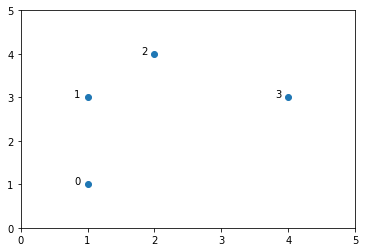

In [270]:
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Initialize Data Set
X = np.array([[1, 1], [1, 3], [2, 4], [4, 3]])

# Plot Data Set
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.text(0.8, 1, '0')
plt.text(0.8, 3, '1')
plt.text(1.8, 4, '2')
plt.text(3.8, 3, '3')
plt.scatter(X[:, 0], X[:, 1])

### Step 1 - Affinity Matrix

#### Affinity Matrix using `rbf`

In [274]:
# Perform Clustering
clustering = SpectralClustering(n_clusters=2,
                                affinity = 'rbf',
                                assign_labels='discretize',
                                random_state=0).fit(X)

# Show the Affinity Matrix
index = list(range(0, len(X)))
columns = list(range(0, len(X)))
clustering.affinity_matrix_
df_affinity = pd.DataFrame(clustering.affinity_matrix_, index = index, columns = columns)
print('The Affinity Matrix is:\n', round(df_affinity, 4))

The Affinity Matrix is:
         0       1       2       3
0  1.0000  0.0183  0.0000  0.0000
1  0.0183  1.0000  0.1353  0.0001
2  0.0000  0.1353  1.0000  0.0067
3  0.0000  0.0001  0.0067  1.0000


When calling fit, an affinity matrix is constructed using either a kernel function such the Gaussian (aka RBF) kernel with Euclidean distance d(X, X): `np.exp(-gamma * d(X,X) ** 2)` or a k-nearest neighbors connectivity matrix. The default for `gamma`is 1.0 as can be inferred from scikit-learns [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html). The Euclidean Distance is equal to:

$$
d(p,q) = \|q-p\|_2 =
\sqrt{(q_1 - p_1)^2 + \cdots + (q_n - p_n)^2} = \sqrt{\sum_{i=1}^n (q_i-p_i)^2}
$$ 

As such, the Affinity Matrix is calculated as such:

In [285]:
import math
# Function to Calculate Euclidean Distance
def euclidean_distance(vector1, vector2):
    distance = math.sqrt(((vector1[0]-vector2[0])**2) + ((vector1[1]-vector2[1])**2))
    return distance

# Calculate Entry for Affinity Matrix
gamma = 1 # default-value
# Determine Shape of Affinity Matrix
shape = (np.shape(X)[0], np.shape(X)[0])
# Construct Empty Affinity Matrix
affinity_matrix_rbf = np.zeros(shape)
# Update entries of affinity matrix
i = 0
j = 0
for i in range (0, shape[0]):
    for j in range (0, shape[0]):
        # Calculate Distance
        distance = euclidean_distance(X[i], X[j])
        # Calculate Entry for Affinity Matrix
        entry = np.exp(-gamma * distance ** 2)
        # Update Affinity Matrix
        affinity_matrix_rbf[i][j] = entry

df_affinity_rbf = pd.DataFrame(affinity_matrix_rbf, index = index, columns = columns)
print('The Affinity Matrix is:\n', round(df_affinity_rbf, 4))

The Affinity Matrix is:
         0       1       2       3
0  1.0000  0.0183  0.0000  0.0000
1  0.0183  1.0000  0.1353  0.0001
2  0.0000  0.1353  1.0000  0.0067
3  0.0000  0.0001  0.0067  1.0000


In [286]:
df_affinity_rbf

,0,1,2,3
0,1.000000,0.018316,0.000045,0.000002
1,0.018316,1.000000,0.135335,0.000123
2,0.000045,0.135335,1.000000,0.006738
3,0.000002,0.000123,0.006738,1.000000


#### Affinity Matrix using `nearest_neighbors`
The default number of neighbors to use when constructing the affinity matrix using the nearest neighbors method is [10](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html). As this example only contains 6 elements, 10 cannot be chosen. Instead `n_neighbors` was set to 4. 

In [287]:
# Perform Clustering
clustering = SpectralClustering(n_clusters=2,
                                affinity='nearest_neighbors',
                                assign_labels='discretize',
                                n_neighbors = 2,
                                random_state=0).fit(X)

# Show the Affinity Matrix
index = list(range(0, len(X)))
columns = list(range(0, len(X)))
df_affinity = pd.DataFrame(clustering.affinity_matrix_.toarray(), index = index, columns = columns)
print('The Affinity Matrix is:\n', round(df_affinity, 4))

The Affinity Matrix is:
      0    1    2    3
0  1.0  0.5  0.0  0.0
1  0.5  1.0  1.0  0.0
2  0.0  1.0  1.0  0.5
3  0.0  0.0  0.5  1.0


`1.0` indicates that when calculating the closest k-datapoints, both datapoints were amongst the respectivve nearest k-datapoints, e.g. when calculating the closest four datapoints for datapoint indexed 0, datapoint indexed 1 was among the nearest four datapoints. At the same time, when calculating the closest four datapoints for datapoint indexed 1, datapoint indexed 0 was also among the nearest four datapoints. `0.5`indicates that this was only true for one datapoint, e.g. when calculating the four nearest datapoints for datapoint indexed 0, the datapoint indexed four was included, but not the other way around. For datapoint indexed 4, the datapoint indexed 0 was not among the four nearest datapoints. 
`0.0` indicates that in both calculations, the other respective datapoint wa not among the k-nearest. 


Scikit-Learn's `SpectralClustering` uses the method `kneighbors_graph`, which computes the (weighted) graph of k-Neighbors for points in the [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html):  
`connectivity = kneighbors_graph(X, n_neighbors=n_neigbors, mode='connectivity', include_self=True)`.  
The affinity matrix is then calculated by 
$$
{Affinity Matrix} = 0.5 * (connectivity + connectivity^T)
$$ 

In [288]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=2, include_self=True)
affinity_matrix_kn = 0.5 * (connectivity + connectivity.T)

# Show the Affinity Matrix using nearest_neighbors
index = list(range(0, len(X)))
columns = list(range(0, len(X)))
df_affinity = pd.DataFrame(affinity_matrix_kn.toarray(), index = index, columns = columns)
print('The Affinity Matrix is:\n', round(df_affinity, 4))

The Affinity Matrix is:
      0    1    2    3
0  1.0  0.5  0.0  0.0
1  0.5  1.0  1.0  0.0
2  0.0  1.0  1.0  0.5
3  0.0  0.0  0.5  1.0


In [289]:
df_connectivity = pd.DataFrame(connectivity.toarray(), index = index, columns = columns)
df_connectivity

,0,1,2,3
0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0


In [290]:
df_affinity

,0,1,2,3
0,1.0,0.5,0.0,0.0
1,0.5,1.0,1.0,0.0
2,0.0,1.0,1.0,0.5
3,0.0,0.0,0.5,1.0


### Step 2 - Spectral Embedding

Spectral embedding for non-linear dimensionality reduction.

Forms an affinity matrix given by the specified function and applies spectral decomposition to the corresponding graph laplacian. The resulting transformation is given by the value of the eigenvectors for each data point.

Note : Laplacian Eigenmaps is the actual algorithm implemented here.

Project the sample on the first eigenvectors of the graph Laplacian.
    The adjacency matrix is used to compute a normalized graph Laplacian
    whose spectrum (especially the eigenvectors associated to the
    smallest eigenvalues) has an interpretation in terms of minimal
    number of cuts necessary to split the graph into comparably sized
    components.
    This embedding can also 'work' even if the ``adjacency`` variable is
    not strictly the adjacency matrix of a graph but more generally
    an affinity or similarity matrix between samples (for instance the
    heat kernel of a euclidean distance matrix or a k-NN matrix).
    However care must taken to always make the affinity matrix symmetric
    so that the eigenvector decomposition works as expected.
    Note : Laplacian Eigenmaps is the actual algorithm implemented here.

To perform the spectral embedding, the function `spectral_embedding` is called. It takes the following inputs.

- **adjacency:** The adjacency or affinity matrix of the graph to embed.
- **n_components:** The dimension of the projection subspace.
- **eigen_solver:** The eigenvalue decomposition strategy to use.
- **eigen_tol:** Stopping criterion for eigendecomposition of the Laplacian matrix when using arpack eigen_solver.
- **drop_first:** Whether to drop the first eigenvector. For spectral embedding, this should be True as the first eigenvector should be constant vector for connected graph, but for spectral clustering, this should be kept as False to retain the first eigenvector.

Within the function `spectral_embedding`, the function `csgraph_laplacian`is called, which returns the Laplacian matrix of a directed [graph](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.laplacian.html). Furthermore, it returns the diagonal of the Laplacian matrix of length N. The eigendecomposition of the laplacian matrix can give insight into many properties of the graph.

In general, the (unnormalized) Laplacian Matrix is calculated as such:

$$
L = D - A
$$

where: 
- L: Laplacian Matrix
- D: Degree Matrix
- A: Affinity or Adjacency Matrix

The Degree Matrix is a diagonal matrix, where the degree of a node (i.e. values) of the diagonal is given by the number of edges connected to it. The degree of the nodes is obtained by taking the sum of each row in the affinity / adjacency matrix.

#### Step 2.1 Laplacian Matrix

In [291]:
# Construct Empty Degree Matrix
degree_matrix_rbf = np.zeros(shape)
# Update entries of Degree matrix
i = 0
for i in range (0, shape[0]):
    sum_row = affinity_matrix_rbf[i, :].sum()
    # Update Degree Matrix
    degree_matrix_rbf[i][i] = sum_row
    
# Transform Degree Matrix into DataFrame
df_degree = pd.DataFrame(degree_matrix_rbf, index = index, columns = columns)
print('The Degree Matrix is:\n', round(df_degree, 4))

The Degree Matrix is:
         0       1       2       3
0  1.0184  0.0000  0.0000  0.0000
1  0.0000  1.1538  0.0000  0.0000
2  0.0000  0.0000  1.1421  0.0000
3  0.0000  0.0000  0.0000  1.0069


In [292]:
df_degree

,0,1,2,3
0,1.018363,0.000000,0.000000,0.000000
1,0.000000,1.153774,0.000000,0.000000
2,0.000000,0.000000,1.142119,0.000000
3,0.000000,0.000000,0.000000,1.006864


In [296]:
# Calculate Laplacian Matrix manually
laplacian_rbf_manuell = degree_matrix_rbf - affinity_matrix_rbf
# Transform Laplacian Matrix into DataFrame
index = list(range(0, len(X)))
columns = list(range(0, len(X)))
df_laplacian_rbf_manuell = pd.DataFrame(laplacian_rbf_manuell, index = index, columns = columns)
print('The Laplacian Matrix is:\n', round(df_laplacian_rbf_manuell, 4))

The Laplacian Matrix is:
         0       1       2       3
0  0.0184 -0.0183 -0.0000 -0.0000
1 -0.0183  0.1538 -0.1353 -0.0001
2 -0.0000 -0.1353  0.1421 -0.0067
3 -0.0000 -0.0001 -0.0067  0.0069


In [297]:
df_laplacian_rbf_manuell 

,0,1,2,3
0,0.018363,-0.018316,-0.000045,-0.000002
1,-0.018316,0.153774,-0.135335,-0.000123
2,-0.000045,-0.135335,0.142119,-0.006738
3,-0.000002,-0.000123,-0.006738,0.006864


The function `csgraph_laplacian` performs the same calculation as can be seen below. The resulting laplacian matrices are identical.

In [298]:
# Imports
from scipy.sparse.csgraph import laplacian as csgraph_laplacian

# Calculate Laplacian Matrix
adjacency = affinity_matrix_rbf
laplacian, diagonal = csgraph_laplacian(adjacency, return_diag=True)

# Transform Laplacian Matrix into DataFrame
df_laplacian_rbf = pd.DataFrame(laplacian, index = index, columns = columns)
print('The Laplacian Matrix is:\n', round(df_laplacian_rbf, 4))

The Laplacian Matrix is:
         0       1       2       3
0  0.0184 -0.0183 -0.0000 -0.0000
1 -0.0183  0.1538 -0.1353 -0.0001
2 -0.0000 -0.1353  0.1421 -0.0067
3 -0.0000 -0.0001 -0.0067  0.0069


In [299]:
# Check for identical results
round(df_laplacian_rbf_manuell, 4) == round(df_laplacian_rbf, 4)

,0,1,2,3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True


#### 2.2 Eigenvalues and Eigenvectors of Laplacian Matrix

In the next step, the eigenvalues of the laplacian matrix are calculated. If the `eigen_solver`is set to `arpack`(default), then the function `eigsh` is called, which finds k eigenvalues and eigenvectors of a real symmetric square [matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html).

The function returns an array of k eigenvalues and an array representing the k eigenvectors.

In [308]:
from scipy.sparse.linalg import eigsh
laplacian = laplacian
# Determine number of components
n_components = 4 
# Determine which eigenvalues to find
which = 'LM' #‘LM’: Largest (in magnitude) eigenvalues
# Relative accuracy for eigenvalues (stopping criterion). The default value of 0 implies machine precision.
eigen_tol = 0
# Calculate Eigenvalues and Eigenvectors
eigenvalues_rbf, eigenvectors_rbf = eigsh(laplacian, k=n_components, sigma=1.0, which=which, tol=eigen_tol)
# Determine diffusion_map
diffusion_map_rbf = eigenvectors_rbf
# Spectral Embedding
embedding_rbf = diffusion_map_rbf.T[n_components::-1]

/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1590: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


In [313]:
np.round(eigenvalues_rbf, 4)

array([-0.    ,  0.0084,  0.0286,  0.2841])

### Plot Eigenvalues
In general, we often look for the first large gap between eigenvalues in order to find the number of clusters expressed in our data. 

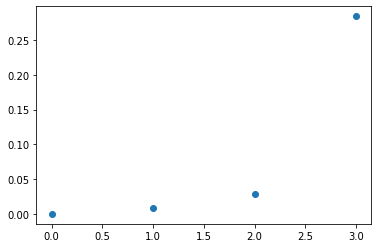

In [316]:
x_axis = list(range(0, len(eigenvalues_rbf)))
y_axis = eigenvalues_rbf
plt.scatter(x_axis, y_axis)

In [309]:
import numpy as np
n_components = 6
# Calculate Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(laplacian)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

# Sort the (eigenvalues, eigenvalues) tuples from high to low (reverse), key=EV
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Spectral Embedding
# Construct the Embedding Matrix out of the n-vectors based on n_components
embedding_matrix = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
for i in range (2, n_components):
    embedding_matrix = np.hstack((embedding_matrix, eigen_pairs[i][1][:, np.newaxis]))
embedding_rbf_manuell = embedding_matrix.T

IndexError: list index out of range

In [310]:
# Comparison
print('Eigenvalues using "eigsh" equal Eigenvalues using "linal.eig :\n', 
      np.round(eigenvalues_rbf, 8) == np.round(sorted(eigenvalues)[-n_components:], 8))
print('Embedding Matrix using "eigsh" equal Embedding Matrix using "linal.eig":\n', 
      np.round(abs(embedding_rbf), 8) == np.round(abs(embedding_rbf_manuell), 8))

Eigenvalues using "eigsh" equal Eigenvalues using "linal.eig :
 [ True  True  True  True]
Embedding Matrix using "eigsh" equal Embedding Matrix using "linal.eig":
 False


<ipython-input-310-a8b41b90a617>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.round(abs(embedding_rbf), 8) == np.round(abs(embedding_rbf_manuell), 8))


#### 2.3 Sign-Flip of Embedding Matrix
In the next step, the sign of the elements of all the vectors in the embedding matrix are flipped such that
the absolute maximum element of each vector is positive.

In [311]:
# np.argmax returns the indices of the maximum values along an axis.
max_abs_rows = np.argmax(np.abs(embedding_rbf_manuell), axis=1)
# np.sign returns an element-wise indication of the sign of a the maximum value along each axis
signs = np.sign(embedding_rbf_manuell[range(embedding_rbf_manuell.shape[0]), max_abs_rows])
# the sign of all the vectors in the embedding matrixs are flipped
embedding_rbf_manuell *= signs[:, np.newaxis]
print('The maximum value along each axis is now positive :\n', 
      np.round(embedding_rbf_manuell, 4))

The maximum value along each axis is now positive :
 [[ 0.8165 -0.4082 -0.4082  0.      0.     -0.    ]
 [ 0.      0.     -0.     -0.4082 -0.4082  0.8165]
 [ 0.      0.7071 -0.7071  0.     -0.     -0.    ]
 [-0.      0.     -0.     -0.7071  0.7071  0.    ]
 [-0.4082 -0.4082 -0.4082  0.4082  0.4082  0.4082]
 [ 0.4082  0.4082  0.4082  0.4082  0.4082  0.4082]]


#### Step 3 Assign Lables

In [306]:
#k_means
from sklearn.cluster import KMeans
maps = embedding_rbf_manuell[:n_components].T
n_clusters = 2
random_state = 0
k = KMeans(n_clusters=n_clusters, random_state=random_state, verbose=False).fit(maps)

k.labels_
# _, labels, _ = KMeans(maps, n_clusters, random_state=random_state)

array([1, 0, 0, 1, 0, 1], dtype=int32)

In [307]:
clustering = SpectralClustering(n_clusters=2,
                                affinity = 'rbf',
                                assign_labels='kmeans',
                                random_state=0).fit(X)

clustering.labels_

array([1, 1, 1, 0], dtype=int32)